In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:\Guvi_projects\Copper Modelling\Copper_Set.csv")

In [4]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [6]:
df['item_date'] = pd.to_datetime(df['item_date'],format = '%Y%m%d',errors = 'coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'],format = '%Y%m%d',errors = 'coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'],errors='coerce')

In [7]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [8]:
df.dtypes

id                object
item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

In [9]:
#Null values
df.isnull().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
dtype: int64

In [10]:
df["material_ref"].fillna("unknown", inplace = True)
df.dropna(inplace = True)

In [11]:
df['material_ref'] = df['material_ref'].apply(lambda x: np.nan if x.startswith('00000') else x)

In [12]:
df.isnull().sum()

id                   0
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref     22726
product_ref          0
delivery date        0
selling_price        0
dtype: int64

In [13]:
df['material_ref'].fillna('unknown',inplace=True)
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [15]:
#Removing Invalid numbers i.e, values<0 to prevent skewness
x =['quantity tons','application','thickness','width','selling_price']
for col in x:
    a = df[col]<=0
    df.loc[a,col] = np.nan

In [16]:
df.isna().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isna().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [47]:
df.min(axis=0)

id               0000C421-EA3C-416C-97DE-25A04632AFF4
item_date                                  2020-07-02
quantity tons                                 0.00001
customer                                      12458.0
country                                          25.0
status                                          Draft
item type                                         IPL
application                                       2.0
thickness                                        0.18
width                                             1.0
material_ref                                        -
product_ref                                    611728
delivery date                              2019-04-01
selling_price                                     0.1
dtype: object

In [48]:
df.max(axis=0)

id               FFFFC917-6713-405F-A6B8-A69DE9160C2C
item_date                                  2021-04-01
quantity tons                            1000000000.0
customer                                   30408185.0
country                                         113.0
status                                      Wonderful
item type                                          WI
application                                      99.0
thickness                                       400.0
width                                          2990.0
material_ref                            zapytannie TH
product_ref                                1722207579
delivery date                              2022-01-01
selling_price                             100001015.0
dtype: object

In [50]:
df["country"].unique()

array([ 28.,  25.,  30.,  32.,  38.,  78.,  27.,  77., 113.,  79.,  26.,
        39.,  40.,  84.,  80., 107.,  89.])

In [55]:
df["item type"].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [51]:
df["product_ref"].unique()

array([1670798778, 1668701718,     628377,     640665,     611993,
       1668701376,  164141591, 1671863738, 1332077137,     640405,
       1693867550, 1665572374, 1282007633, 1668701698,     628117,
       1690738206,     628112,     640400, 1671876026,  164336407,
        164337175, 1668701725, 1665572032,     611728, 1721130331,
       1693867563,     611733, 1690738219, 1722207579,  929423819,
       1665584320, 1665584662, 1665584642], dtype=int64)

In [53]:
df["quantity tons"].count()

181620

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

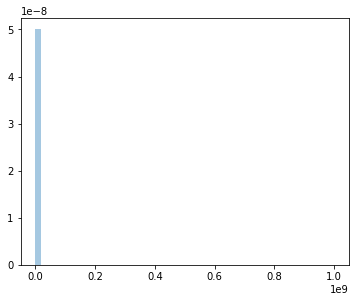

In [19]:
#Plotting
x =['quantity tons','country','application','thickness','width','selling_price']
plt.figure(figsize=(20,10))
for i,feature in enumerate(x):
    plt.subplot(2,3,i+1)
    sns.distplot(df[feature])


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

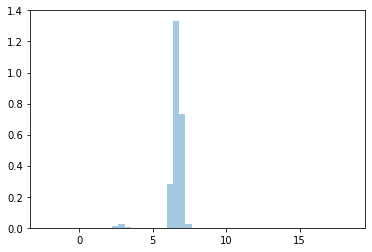

In [20]:
#LogTransformation
data = df.copy()

data['selling_price'] = np.log(data['selling_price'])
sns.distplot(data['selling_price'])
plt.show()

data['quantity tons'] = np.log(data['quantity tons'])
sns.distplot(data['quantity tons'])
plt.show()

data['thickness'] = np.log(data['thickness'])
sns.distplot(data['thickness'])
plt.show()

In [21]:
data.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,unknown,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,6.357842


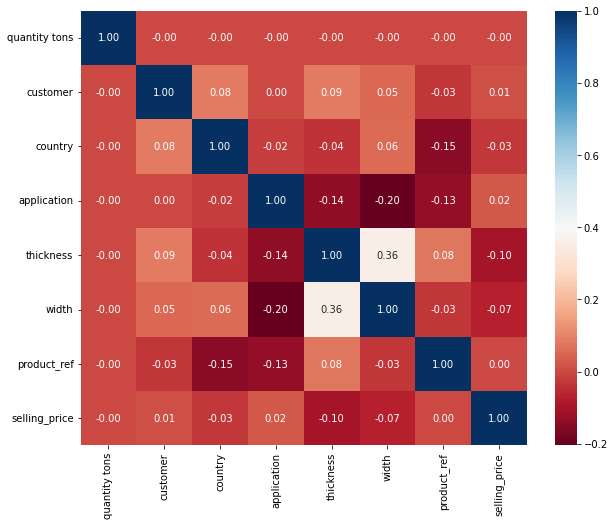

In [22]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(),annot=True,cmap='RdBu', fmt=".2f")
plt.show()

In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report


Regression

In [24]:
x = data[["quantity tons", "customer", "country", 'application','thickness','width','product_ref']]
y = data ["selling_price"]

In [25]:
cat1 = OneHotEncoder()
item_type = cat1.fit_transform(data[["item type"]]).toarray()
cat2 = OneHotEncoder()
status = cat2.fit_transform(data[["status"]]).toarray()

In [26]:
x = np.concatenate((x.values,item_type,status),axis=1)

In [27]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [29]:
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor.fit(x_train,y_train)
y_pred = RandomForestRegressor.predict(x_test)
r2_score(y_test,y_pred)

0.932871779744692

In [30]:
#Testing
# ['quantity tons','customer','country','application','thickness','width','product_ref','item_type','status']
# convert quantity tons and thickness to log

new_sample = np.array([[np.log(100),9431,23,43,np.log(99),43,5342,'W','Won']])
new_cat1 = cat1.transform(new_sample[:,[7]]).toarray()
new_cat2 = cat2.transform(new_sample[:,[8]]).toarray()
x = np.concatenate([new_sample[:,:7],new_cat1,new_cat2],axis=1)
final = scaler.transform(x)
prediction = RandomForestRegressor.predict(final)

In [31]:
print('Price:',np.exp(prediction)[0])

Price: 1005.573422369961


Creating Pickle files

In [52]:
import pickle

with open('copper_rfr.pkl','wb') as f:
    pickle.dump(RandomForestRegressor,f)
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)
with open('cat1.pkl','wb') as f:
    pickle.dump(cat1,f)
with open('cat2.pkl','wb') as f:
    pickle.dump(cat2,f)

CLASSIFICATION

In [32]:
data1 = data.copy()

In [33]:
data1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,unknown,1668701718,2021-04-01,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,6.357842


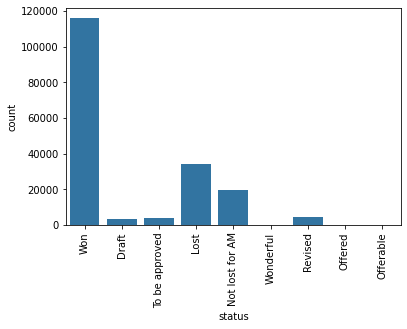

In [34]:
sns.countplot(data=data1, x='status')
plt.xticks(rotation=90)
plt.show()

In [35]:
data1['status'] = data1['status'].apply(lambda x: 'Won' if x in ['Won','To be approved','offered','offerable','Wonderful'] else 'Lost')

<AxesSubplot:xlabel='status', ylabel='count'>

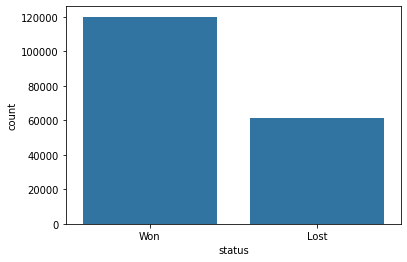

In [36]:
sns.countplot(data = data1, x='status')

In [37]:
data1.shape

(181620, 14)

In [38]:
data1.status.value_counts()

status
Won     120164
Lost     61456
Name: count, dtype: int64

In [39]:
x = data1[['quantity tons','customer','country','application','thickness','width','product_ref','selling_price']]
y = data1['status']

In [40]:
cat3 = OneHotEncoder()
item_type = cat3.fit_transform(data[['item type']]).toarray()
x = np.concatenate([x.values,item_type],axis=1)

In [41]:
le = LabelEncoder()
y = le.fit_transform(data1[['status']])
y

array([1, 1, 1, ..., 1, 1, 1])

In [42]:
scaler1 = StandardScaler()
x = scaler1.fit_transform(x)

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [44]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     18400
           1       0.92      0.92      0.92     36086

    accuracy                           0.89     54486
   macro avg       0.88      0.88      0.88     54486
weighted avg       0.89      0.89      0.89     54486

0.8931652167529274
[[15385  3015]
 [ 2806 33280]]


In [45]:
#Testing
# ['quantity tons','customer','country','application','thickness','width','product_ref','selling_price']

new = np.array([[np.log(100),9431,23,43,np.log(99),43,5342,np.log(10000),'W']])
a = cat3.transform(new[:,[8]]).toarray()
new = np.concatenate([new[:,:8],a],axis=1)
x = scaler1.transform(new)
out = rfc.predict(x)

In [46]:
status = le.inverse_transform(out)
status


array(['Won'], dtype=object)

In [69]:
import pickle

with open('copper_rfc.pkl','wb') as f:
    pickle.dump(RandomForestClassifier,f)
with open('ohe3.pkl','wb') as f:
    pickle.dump(cat3,f)
with open('le.pkl','wb') as f:
    pickle.dump(le,f)
with open('scaler1.pkl','wb') as f:
    pickle.dump(scaler1,f)